In [1]:
%pip install numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

Looking in indexes: https://download.pytorch.org/whl/cu126
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 2060


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: ', device)

Using device:  cuda


In [5]:
%pip install --no-cache-dir numpy==1.23.5 scipy scikit-learn==1.3.0 scikeras tensorflow keras

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy==1.23.5 in c:\users\aledh\appdata\local\programs\python\python39\lib\site-packages (1.23.5)
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0

  You can safely remove it manually.


In [6]:
%pip install scikit-learn==1.2.2

  Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl (8.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Load the dataset
file_path = '../skripsi/dataset_mandiri_20tahun.csv'
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       4937 non-null   object
 1   Open       4937 non-null   object
 2   High       4937 non-null   object
 3   Low        4937 non-null   object
 4   Close      4937 non-null   object
 5   Adj Close  4937 non-null   object
 6   Volume     4937 non-null   object
dtypes: object(7)
memory usage: 270.1+ KB


In [9]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,4937,4937,4937,4937,4937,4937,4937
unique,4937,738,754,762,766,1669,4810
top,"Dec 30, 2024","3,500.00","1,762.50","3,475.00","3,587.50","1,078.23",-
freq,1,26,26,30,30,17,105


In [10]:
df.isnull().sum()/len(df)

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [11]:
df.duplicated().sum()

0

<Axes: ylabel='Close'>

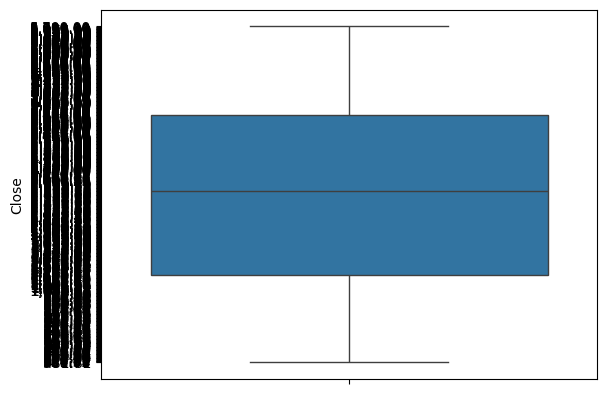

In [12]:
#cek outlier
import seaborn as sns
sns.boxplot(y=df['Close'])


In [13]:
df['Date'] = pd.to_datetime(df['Date'])

# Clean and convert numeric columns to float (remove commas and handle non-numeric values)
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in numeric_columns:
    # Convert column to string first, then remove commas
    df[col] = df[col].astype(str).str.replace(',', '', regex=True)
    # Convert to numeric, set errors to NaN for invalid values
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4937 non-null   datetime64[ns]
 1   Open       4937 non-null   float64       
 2   High       4937 non-null   float64       
 3   Low        4937 non-null   float64       
 4   Close      4937 non-null   float64       
 5   Adj Close  4937 non-null   float64       
 6   Volume     4832 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 270.1 KB


In [14]:
df.isna().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume       105
dtype: int64

In [15]:
df['Volume'].fillna(df['Volume'].mean(), inplace=True)

In [16]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,4937,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4.937000e+03
mean,2014-12-24 02:29:02.758760192,2538.934047,2568.830737,2505.757308,2538.362820,1992.155289,1.274387e+08
min,2005-01-03 00:00:00,280.240000,282.700000,270.410000,272.870000,144.060000,4.000000e+00
25%,2009-12-29 00:00:00,1149.240000,1161.530000,1130.800000,1149.240000,695.840000,6.614510e+07
50%,2015-01-12 00:00:00,2425.000000,2456.250000,2393.750000,2425.000000,1647.520000,9.767400e+07
75%,2019-11-25 00:00:00,3512.500000,3550.000000,3462.500000,3500.000000,2756.970000,1.474136e+08
max,2024-12-30 00:00:00,7450.000000,7550.000000,7400.000000,7450.000000,7450.000000,1.899751e+09
std,NaN,1642.691574,1659.388604,1625.540178,1642.070782,1637.221339,1.128514e+08


In [17]:
df.sort_values('Date', inplace=True, ignore_index=True)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,474.44,474.44,454.78,462.15,232.60,95398825.0
1,2005-01-04,462.15,491.65,462.15,491.65,247.44,380722734.0
2,2005-01-05,491.65,503.94,485.51,491.65,247.44,242069715.0
3,2005-01-06,485.51,503.94,485.51,503.94,253.63,158726170.0
4,2005-01-07,503.94,503.94,485.51,491.65,247.44,343273463.0


In [18]:
df = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis='columns')
df

,Date,Close
0,2005-01-03,462.15
1,2005-01-04,491.65
2,2005-01-05,491.65
3,2005-01-06,503.94
4,2005-01-07,491.65
...,...,...
4932,2024-12-20,5675.00
4933,2024-12-23,5825.00
4934,2024-12-24,5750.00
4935,2024-12-27,5800.00


In [19]:
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [20]:
print("Starting date: ", df.iloc[0][0])
print("Ending date: ", df.iloc[-1][0])
print("Durasi: ", df.iloc[-1][0]-df.iloc[0][0])

Starting date:  2005-01-03 00:00:00
Ending date:  2024-12-30 00:00:00
Durasi:  7301 days 00:00:00


<Axes: xlabel='Date', ylabel='Close'>

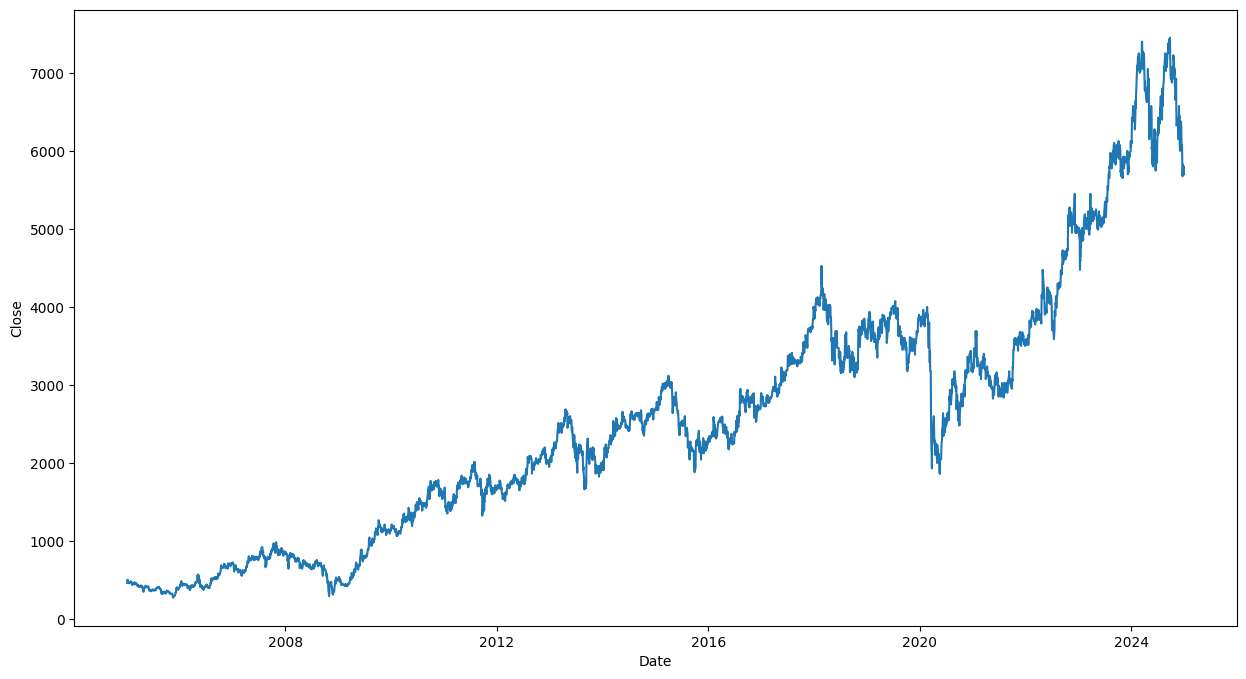

In [21]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='Date', y='Close')


In [22]:
train_unit = int(len(df) * 0.8)
test_unit = len(df) - train_unit
train_unit

3949

In [23]:
train = df[:3949]
test= df[3949:]
train

,Date,Close
0,2005-01-03,462.15
1,2005-01-04,491.65
2,2005-01-05,491.65
3,2005-01-06,503.94
4,2005-01-07,491.65
...,...,...
3944,2020-11-24,3212.50
3945,2020-11-25,3262.50
3946,2020-11-26,3362.50
3947,2020-11-27,3325.00


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = scaler.fit_transform(train[['Close']])
test = scaler.fit_transform(test[['Close']])
test

array([[0.09459459],
       [0.10810811],
       [0.1       ],
       [0.1027027 ],
       [0.11351351],
       [0.11081081],
       [0.12432432],
       [0.12162162],
       [0.11621622],
       [0.11351351],
       [0.12162162],
       [0.13243243],
       [0.11351351],
       [0.11351351],
       [0.08108108],
       [0.07567568],
       [0.09459459],
       [0.08378378],
       [0.07297297],
       [0.09189189],
       [0.08378378],
       [0.08378378],
       [0.08918919],
       [0.0972973 ],
       [0.12972973],
       [0.14054054],
       [0.13783784],
       [0.12972973],
       [0.11621622],
       [0.13783784],
       [0.14324324],
       [0.18648649],
       [0.17297297],
       [0.16756757],
       [0.17837838],
       [0.18648649],
       [0.17837838],
       [0.15135135],
       [0.1       ],
       [0.11351351],
       [0.08918919],
       [0.09189189],
       [0.1       ],
       [0.0972973 ],
       [0.1       ],
       [0.09189189],
       [0.09189189],
       [0.091

In [25]:
# %pip install statsmodels


In [26]:
# df.isna().sum()

In [27]:
# #cek data stationer atau tidak 
# from statsmodels.tsa.stattools import adfuller
# def adfuller_test(close):
#   result=adfuller(close)
#   labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
#   for value,label in zip(result,labels):
#     print(label+' : '+str(value) )
#   if result[1] <= 0.05:
#     print("strong evidence against the null hypothesis(Ho), Data is stationary")
#   else:
#     print("weak evidence against null hypothesis, indicating it is non- stationary ")
# adfuller_test(df['Close'])


In [28]:
# # Differencing pada kolom Close
# df['Close_diff'] = df['Close'].diff()

# print("Data setelah differencing:")
# print(df)

In [29]:
# # Mengganti NaN dengan mean dari kolom Close_diff
# mean_close_diff = df['Close_diff'].mean()
# df['Close_diff'].fillna(mean_close_diff, inplace=True)

# print("Data setelah differencing dan mengganti NaN dengan mean:")
# print(df)

In [30]:
# adfuller_test(df['Close_diff'])

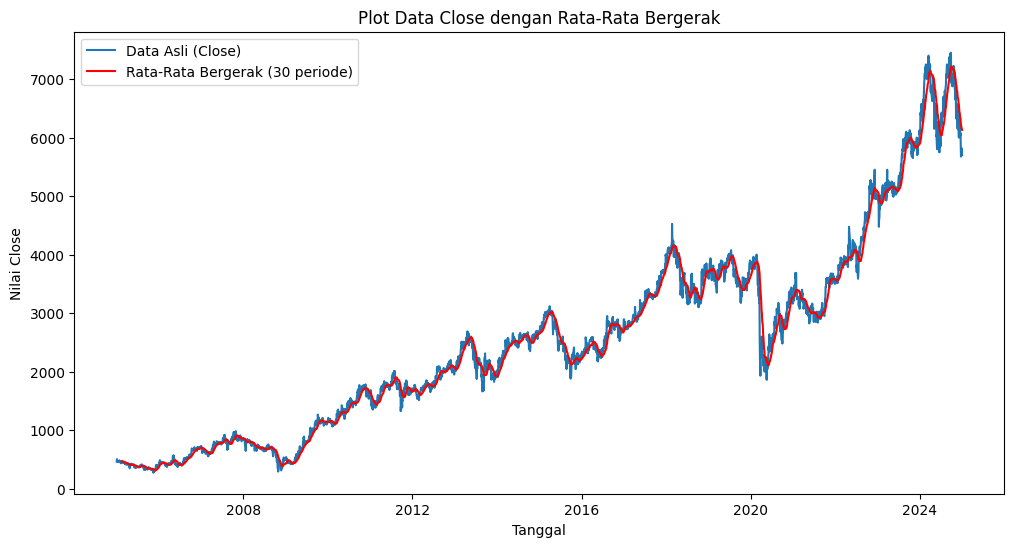

In [31]:
# Menghitung rata-rata bergerak
window_size = 30
df['asli_Close'] = df['Close'].rolling(window=window_size).mean()

# Plot data asli dan rata-rata bergerak
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Data Asli (Close)')
plt.plot(df['Date'], df['asli_Close'], label=f'Rata-Rata Bergerak ({window_size} periode)', color='red')

plt.title('Plot Data Close dengan Rata-Rata Bergerak')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Close')
plt.legend()
plt.show()

In [32]:
def sliding_window(data, window_size):
    sub_seq, next_values = [], []
    for i in range(len(data) - window_size):
        sub_seq.append(data[i:i+window_size])
        next_values.append(data[i+window_size])
    x = np.stack(sub_seq)
    y = np.array(next_values)
    return x, y

window_size = 30
X_train, y_train = sliding_window(train, window_size)
X_test, y_test = sliding_window(test, window_size)

# Reshape X_train dan X_test untuk menambahkan dimensi fitur
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3919, 30, 1) (3919, 1)
(958, 30, 1) (958, 1)


In [33]:
# Membuat model LSTM
from keras.models import Sequential
from keras.layers import GRU, Dense

model = Sequential()    
model.add(GRU(50, input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Melatih model
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# Prediksi menggunakan data pengujian
testPredict = model.predict(test)


Epoch 1/100
3919/3919 - 18s - 5ms/step - loss: 9.4106e-04 - mae: 0.0152
Epoch 2/100
3919/3919 - 16s - 4ms/step - loss: 2.2267e-04 - mae: 0.0109
Epoch 3/100
3919/3919 - 16s - 4ms/step - loss: 2.0300e-04 - mae: 0.0104
Epoch 4/100
3919/3919 - 16s - 4ms/step - loss: 1.7351e-04 - mae: 0.0095
Epoch 5/100
3919/3919 - 15s - 4ms/step - loss: 1.7552e-04 - mae: 0.0095
Epoch 6/100
3919/3919 - 15s - 4ms/step - loss: 1.6834e-04 - mae: 0.0093
Epoch 7/100
3919/3919 - 15s - 4ms/step - loss: 1.6535e-04 - mae: 0.0092
Epoch 8/100
3919/3919 - 16s - 4ms/step - loss: 1.6917e-04 - mae: 0.0094
Epoch 9/100
3919/3919 - 16s - 4ms/step - loss: 1.6254e-04 - mae: 0.0091
Epoch 10/100
3919/3919 - 16s - 4ms/step - loss: 1.6206e-04 - mae: 0.0091
Epoch 11/100
3919/3919 - 15s - 4ms/step - loss: 1.6082e-04 - mae: 0.0091
Epoch 12/100
3919/3919 - 15s - 4ms/step - loss: 1.5737e-04 - mae: 0.0090
Epoch 13/100
3919/3919 - 16s - 4ms/step - loss: 1.6187e-04 - mae: 0.0090
Epoch 14/100
3919/3919 - 16s - 4ms/step - loss: 1.6040e-04 -

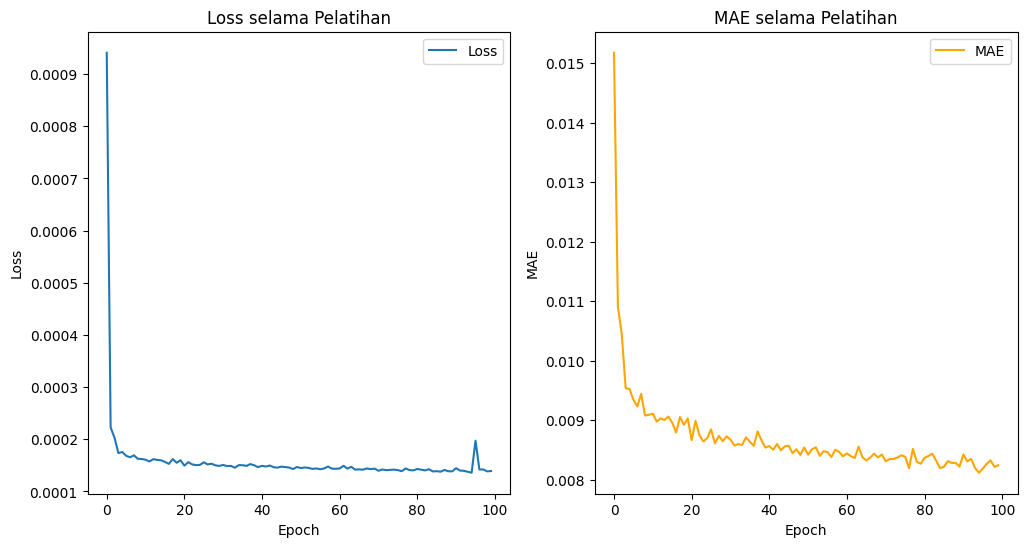

In [34]:
import matplotlib.pyplot as plt

# Plot loss dan MAE selama pelatihan
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE', color='orange')
plt.title('MAE selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [35]:
from sklearn import metrics
from sklearn.metrics import r2_score


mae_test = metrics.mean_absolute_error(test, testPredict)
mse_test = metrics.mean_squared_error(test, testPredict)
rmse_test = np.sqrt(mse_test)
r2 = r2_score(test, testPredict)


print("Hasil MAE Test : ", mae_test)
print("Hasil MSE Test : ", mse_test)
print("Hasil RMSE Test : ", rmse_test)
print("Hasil R2 Test : ", r2)


Hasil MAE Test :  0.003667200182551619
Hasil MSE Test :  2.1403708378197502e-05
Hasil RMSE Test :  0.004626414203051593
Hasil R2 Test :  0.9997496413547866


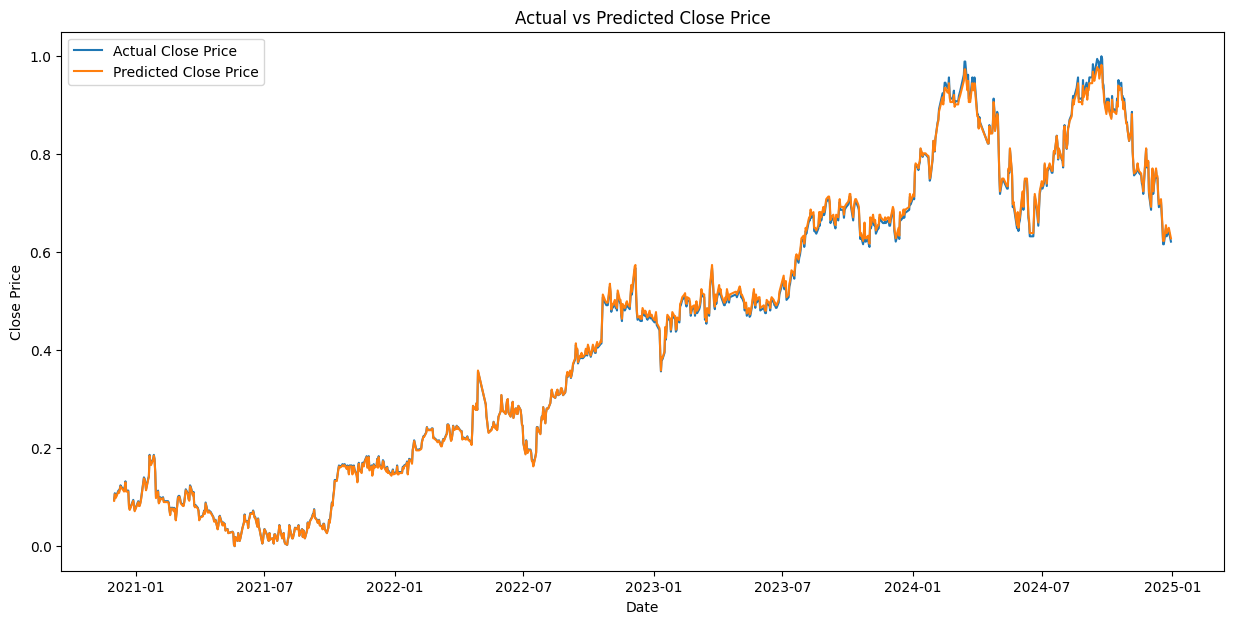

In [36]:
# Asumsikan Anda memiliki DataFrame `df` yang berisi kolom 'Date' dan 'Close'
# dan `testPredict` adalah hasil prediksi dari model GRU Anda.

# Plotting hasil prediksi vs data aktual
plt.figure(figsize=(15, 7))
plt.plot(df['Date'].iloc[-len(test):], test, label='Actual Close Price')
plt.plot(df['Date'].iloc[-len(test):], testPredict, label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


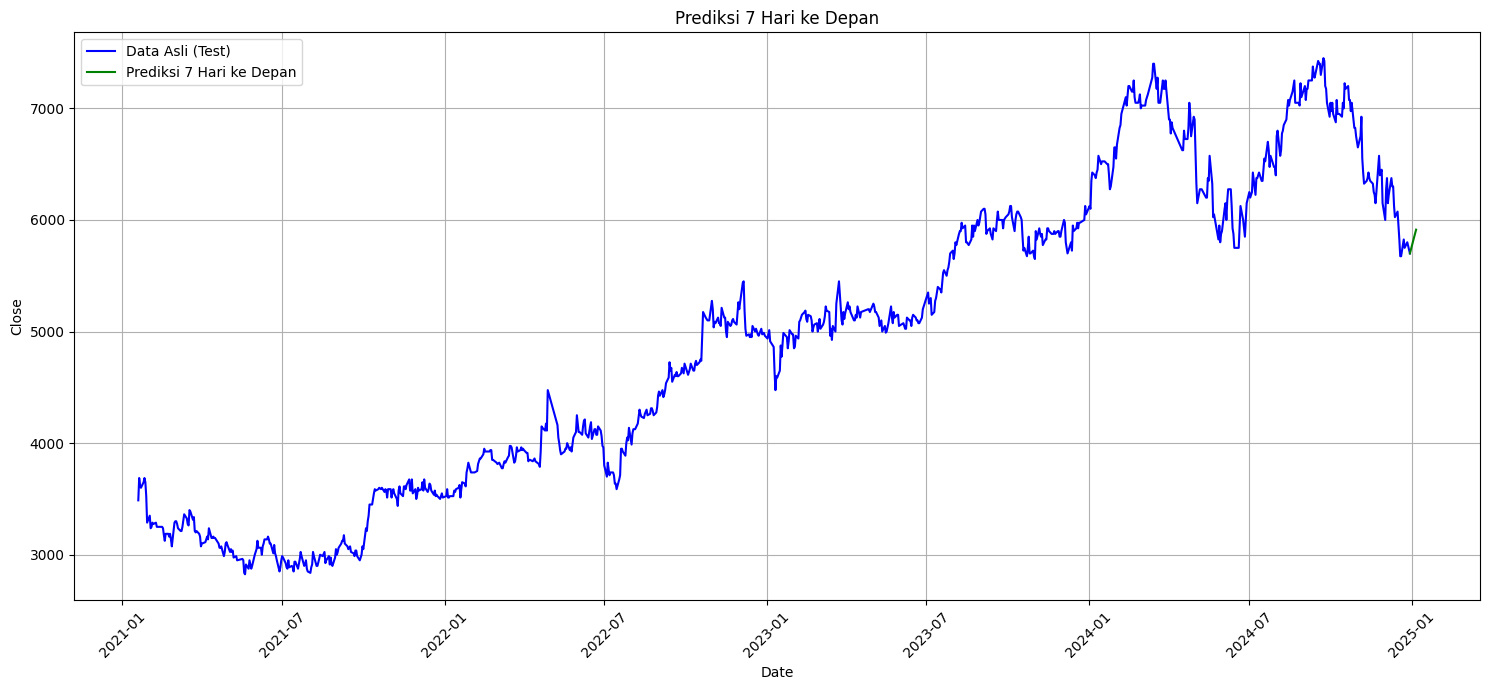

In [39]:
# Inverse transform y_test to get the original values
true_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Prediksi 7 hari ke depan
# Kita perlu menggunakan data terakhir dari test set sebagai input untuk prediksi
last_sequence = test[-1].reshape(1, -1)  # Ambil sequence terakhir dari test set
predict_next_7_days = []

for _ in range(7):
    next_pred = model.predict(last_sequence)
    predict_next_7_days.append(next_pred[0][0])
    # Update last_sequence dengan prediksi terbaru
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0, -1] = next_pred

# Inverse transform prediksi ke skala asli
predict_next_7_days_original = scaler.inverse_transform(np.array(predict_next_7_days).reshape(-1, 1))

# Tanggal untuk data test
test_dates = df['Date'][-len(y_test):].reset_index(drop=True)

# Tanggal untuk prediksi 7 hari ke depan
last_date = test_dates.iloc[-1]
prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7, freq='D')

# Plotting hasil prediksi
plt.figure(figsize=(15, 7))

# Plot data asli (test data)
plt.plot(test_dates, true_test, label='Data Asli (Test)', color='blue')

# Plot prediksi 7 hari ke depan
# Tambahkan titik terakhir dari data asli ke awal prediksi untuk menghubungkan garis
plt.plot([test_dates.iloc[-1]] + prediction_dates.tolist(), 
         [true_test[-1][0]] + predict_next_7_days_original.flatten().tolist(), 
         label='Prediksi 7 Hari ke Depan', color='green')

# Menambahkan judul dan label
plt.title('Prediksi 7 Hari ke Depan')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotasi tanggal agar tidak bertumpuk
plt.tight_layout()  # Agar layout tidak terpotong
plt.show()

In [40]:
# Membuat DataFrame untuk prediksi 7 hari ke depan
future_predictions = pd.DataFrame({
    'Date': prediction_dates,
    'Predict': predict_next_7_days_original.flatten()
})

# Menampilkan tabel prediksi 7 hari ke depan
print("Prediksi 7 Hari ke Depan:")
print(future_predictions)

Prediksi 7 Hari ke Depan:
        Date      Predict
0 2024-12-31  5730.923340
1 2025-01-01  5761.761230
2 2025-01-02  5792.463379
3 2025-01-03  5822.979980
4 2025-01-04  5853.263184
5 2025-01-05  5883.262207
6 2025-01-06  5912.930176


In [42]:
from tensorflow.keras.models import save_model
save_model(model, 'gru_model.h5')  # Simpan model